### Please complete the following sections sequentially to complete this assignment.

##### <span style="color:red">Note: You can create as many code or markdown cells as you deem necessary to answer each question. However, please leave the problems unchanged. We will evaluate your solutions by executing your code sequentially.</span> 
---

**Within the expansion of the Internet and Web, there has also been a growing interest in online articles and reviews, which allows an easy and fast spread of information worldwide. Thus, predicting the popularity of online news has become a trend. Popularity is often measured by considering the number of interactions in the Web and social networks (e.g., number of shares, likes, and comments). Predicting such popularity is valuable for advertisers, authors, content providers, and even activists/politicians (e.g., to understand or influence public opinion). In this assignment, we use a news popularity dataset utilized by Fernandes et al. (2015) based on the articles published by [Mashable](https://mashable.com/) from January 7, 2013, to January 7, 2015.**

**<span style="color:red">The objective of this assignment is to predict whether or not a news article becomes popular. </span> The assignment's dataset is included in the homework's zipped folder. Table below has the description of each variable in the dataset.**

| Variable                      | Description                                                                       |
|-------------------------------|-----------------------------------------------------------------------------------|
| url                           | URL of the article (non-predictive)                                               |
| timedelta                     | Days between the article publication and the dataset acquisition (non-predictive) |
| n_tokens_title                | Number of words in the title                                                      |
| n_tokens_content              | Number of words in the content                                                    |
| n_unique_tokens               | Rate of unique words in the content                                               |
| n_non_stop_words              | Rate of non-stop words in the content                                             |
| n_non_stop_unique_tokens      | Rate of unique non-stop words in the content                                      |
| num_hrefs                     | Number of links                                                                   |
| num_self_hrefs                | Number of links to other articles published by Mashable                           |
| num_imgs                      | Number of images                                                                  |
| num_videos                    | Number of videos                                                                  |
| average_token_length          | Average length of the words in the content                                        |
| num_keywords                  | Number of keywords in the metadata                                                |
| data_channel_is_lifestyle     | Is data channel 'Lifestyle'?                                                      |
| data_channel_is_entertainment | Is data channel 'Entertainment'?                                                  |
| data_channel_is_bus           | Is data channel 'Business'?                                                       |
| data_channel_is_socmed        | Is data channel 'Social Media'?                                                   |
| data_channel_is_tech          | Is data channel 'Tech'?                                                           |
| data_channel_is_world         | Is data channel 'World'?                                                          |
| kw_min_min                    | Min. shares of the Worst keyword in the article                                   |
| kw_max_min                    | Max. shares of the Worst keyword in the article                                   |
| kw_avg_min                    | Avg. shares of the Worst keyword in the article                                   |
| kw_min_max                    | Min. shares of the best keyword in the article                                    |
| kw_max_max                    | Max. shares of the best keyword in the article                                    |
| kw_avg_max                    | Avg. shares of the best keyword in the article                                    |
| kw_min_avg                    | Min. shares of the average keyword in the article                                 |
| kw_max_avg                    | Max. shares of the average keyword in the article                                 |
| kw_avg_avg                    | Avg. shares of the average keyword in the article                                 |
| self_reference_min_shares     | Min. shares of referenced articles in Mashable                                    |
| self_reference_max_shares     | Max. shares of referenced articles in Mashable                                    |
| self_reference_avg_sharess    | Avg. shares of referenced articles in Mashable                                    |
| weekday_is_monday             | Was the article published on a Monday?                                            |
| weekday_is_tuesday            | Was the article published on a Tuesday?                                           |
| weekday_is_wednesday          | Was the article published on a Wednesday?                                         |
| weekday_is_thursday           | Was the article published on a Thursday?                                          |
| weekday_is_friday             | Was the article published on a Friday?                                            |
| weekday_is_saturday           | Was the article published on a Saturday?                                          |
| weekday_is_sunday             | Was the article published on a Sunday?                                            |
| is_weekend                    | Was the article published on the weekend?                                         |
| LDA_00                        | Closeness to LDA topic 0                                                          |
| LDA_01                        | Closeness to LDA topic 1                                                          |
| LDA_02                        | Closeness to LDA topic 2                                                          |
| LDA_03                        | Closeness to LDA topic 3                                                          |
| LDA_04                        | Closeness to LDA topic 4                                                          |
| global_subjectivity           | Text subjectivity                                                                 |
| global_sentiment_polarity     | Text sentiment polarity                                                           |
| global_rate_positive_words    | Rate of positive words in the content                                             |
| global_rate_negative_words    | Rate of negative words in the content                                             |
| rate_positive_words           | Rate of positive words among non-neutral tokens                                   |
| rate_negative_words           | Rate of negative words among non-neutral tokens                                   |
| avg_positive_polarity         | Avg. polarity of positive words                                                   |
| min_positive_polarity         | Min. polarity of positive words                                                   |
| max_positive_polarity         | Max. polarity of positive words                                                   |
| avg_negative_polarity         | Avg. polarity of negative words                                                   |
| min_negative_polarity         | Min. polarity of negative words                                                   |
| max_negative_polarity         | Max. polarity of negative words                                                   |
| title_subjectivity            | Title subjectivity                                                                |
| title_sentiment_polarity      | Title polarity                                                                    |
| abs_title_subjectivity        | Absolute subjectivity level                                                       |
| abs_title_sentiment_polarity  | Absolute polarity level                                                           |
| shares (DO NOT USE)            | Number of shares                                                                  |
| **popular (Target)**          | **whether the article is popular (yes/no)**                                       |

Reference:

Fernandes, K., Vinagre, P., & Cortez, P. (2015, September). A proactive intelligent decision support system for predicting the popularity of online news. In Portuguese Conference on Artificial Intelligence (pp. 535-546). Springer, Cham.

---
### Data Exploration

**Note: Before starting the assignment, import all necessary libraries and read the dataset into the Python environment.**

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
pd.set_option('display.max_columns', None)
import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.inspection import permutation_importance
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, RocCurveDisplay, auc, r2_score, ConfusionMatrixDisplay, accuracy_score
from sklearn.inspection import permutation_importance
from sklearn import tree

from pydotplus import graph_from_dot_data

# Generate a unique color
def generate_unique_color():
    color = "#" + ''.join([random.choice('0123456789ABCDEF') for _ in range(6)])
    return color

df = pd.read_csv('online_news_popularity.csv')

**1- Explore the data by creating <span style="color:red">three </span> meaningful visualizations and interpreting them. Write your interpretations in a markdown cell. (30 pts)**

- 1. The box plot below represents the sentiment polarity of articles published on different weekdays. This can reveal any variations in sentiment across different days of the week and provide insights into potential trends.

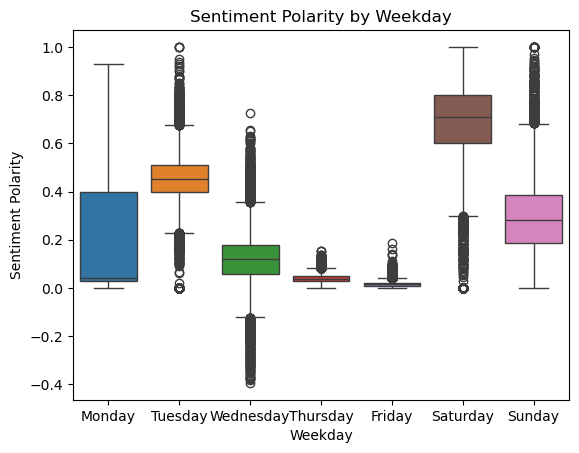

In [7]:
weekday_cols = df.iloc[:, 32:39]
weekday_cols.columns = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.boxplot(data=weekday_cols)
plt.xlabel('Weekday')
plt.ylabel('Sentiment Polarity')
plt.title('Sentiment Polarity by Weekday')
plt.show()

- 2. The visualization below shows the distribution of the number of words in the title of an article. This can provide insights into the typical length of titles and any potential patterns or outliers.

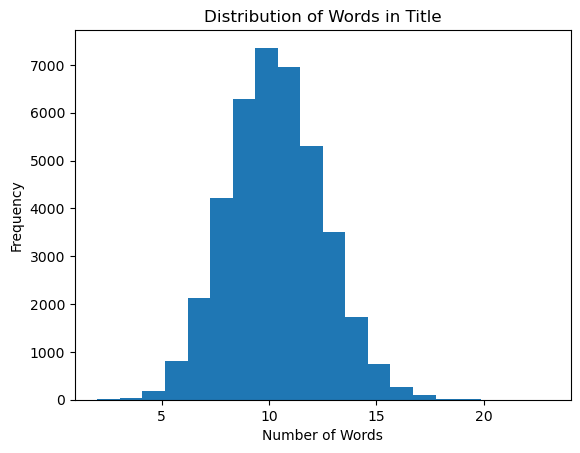

In [8]:
plt.hist(df['n_tokens_title'], bins=20)
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.title('Distribution of Words in Title')
plt.show()

- 3. The visualization below explores the relationship between the number of images in an article and the number of shares it receives. This can help determine if articles with more images tend to be more popular.

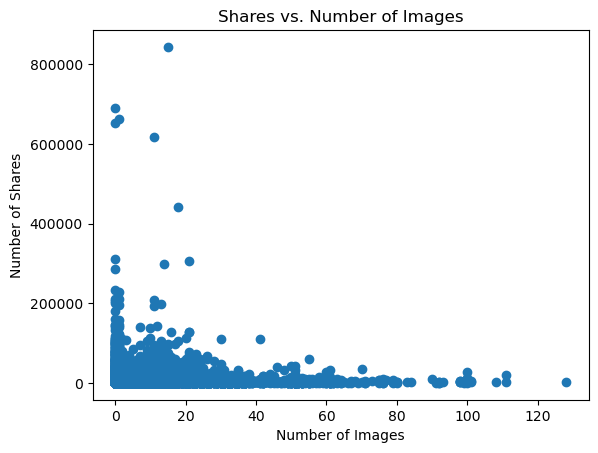

In [9]:
plt.scatter(df['num_imgs'], df['shares'])
plt.xlabel('Number of Images')
plt.ylabel('Number of Shares')
plt.title('Shares vs. Number of Images')
plt.show()

**2- Explore the data by creating <span style="color:red">three </span> meaningful summary tables and interpreting them. Write your interpretations in a markdown cell. (30 pts)**

- 1. The summary below helps to get a quick overview of the distribution and central tendencies of the numerical data in the DataFrame. It is useful for identifying outliers, understanding the range of values, and detecting potential data issues.

In [10]:
df.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,354.530471,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,4.548239,7.223767,26.106801,1153.951682,312.366967,13612.354102,752324.066694,259281.938083,1117.146610,5657.211151,3135.858639,3998.755396,10329.212662,6401.697580,0.130915,0.184599,0.141256,0.216321,0.223770,0.234029,0.443370,0.119309,0.039625,0.016612,0.682150,0.287934,0.353825,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,214.163767,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,0.844406,1.909130,69.633215,3857.990877,620.783887,57986.029357,214502.129573,135102.247285,1137.456951,6098.871957,1318.150397,19738.670516,41027.576613,24211.332231,0.337312,0.262975,0.219707,0.282145,0.295191,0.289183,0.116685,0.096931,0.017429,0.010828,0.190206,0.156156,0.104542,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.393750,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,164.000000,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,4.478404,6.000000,-1.000000,445.000000,141.750000,0.000000,843300.000000,172846.875000,0.000000,3562.101631,2382.448565,639.000000,1100.000000,981.187500,0.000000,0.025051,0.025012,0.028571,0.028571,0.028574,0.396167,0.057757,0.028384,0.009615,0.600000,0.185185,0.306244,0.050000,0.600000,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000
50%,339.000000,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,4.664082,7.000000,-1.000000,660.000000,235.500000,1400.000000,843300.000000,244572.222250,1023.635611,4355.688836,2870.074878,1200.000000,2800.000000,2200.000000,0.000000,0.033387,0.033345,0.040004,0.040001,0.040727,0.453457,0.119117,0.039023,0.015337,0.710526,0.280000,0.358755,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1400.000000
75%,542.000000,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,1.000000,4.854839,9.000000,4.000000,1000.000000,357.000000,7900.000000,843300.000000,330980.000000,2056.781032,6019.953968,3600.229564,2600.000000,8000.000000,5200.000000,0.000000,0.24

- 2. The summary below provides a quick look at whether there are missing values for any of the variables. Helps detect what variables we will need to handle missing values for.

In [11]:
df.isna().sum()

url                             0
timedelta                       0
data_channel                    0
weekday                         0
n_tokens_title                  0
n_tokens_content                0
n_unique_tokens                 0
n_non_stop_words                0
n_non_stop_unique_tokens        0
num_hrefs                       0
num_self_hrefs                  0
num_imgs                        0
num_videos                      0
average_token_length            0
num_keywords                    0
kw_min_min                      0
kw_max_min                      0
kw_avg_min                      0
kw_min_max                      0
kw_max_max                      0
kw_avg_max                      0
kw_min_avg                      0
kw_max_avg                      0
kw_avg_avg                      0
self_reference_min_shares       0
self_reference_max_shares       0
self_reference_avg_sharess      0
is_weekend                      0
LDA_00                          0
LDA_01        

- 3. The summary table below summarizes the mean of each variable grouping by whether they were popular articles or not. This provides a quick overview of the average of each variable and its relationship with the target (output).

In [12]:
df_mean = df.groupby(['popular']).mean().sort_values(by=['popular'], ascending=False)
df_mean

C:\Users\Chaye\AppData\Local\Temp\ipykernel_4168\1373679146.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_mean = df.groupby(['popular']).mean().sort_values(by=['popular'], ascending=False)


,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
popular,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
yes,363.169282,10.311761,564.763354,0.557552,1.016593,0.695560,11.839605,3.439680,5.066134,1.278103,4.525572,7.354212,29.443651,1245.440539,333.277373,14010.387634,745385.667013,261283.177422,1213.606528,6059.168384,3330.306521,4975.159428,12656.175125,7879.859775,0.175333,0.201133,0.125055,0.174144,0.239940,0.259680,0.450795,0.125974,0.040617,0.016350,0.689756,0.277532,0.356594,0.093681,0.766492,-0.259675,-0.522068,-0.107474,0.292179,0.084696,0.342402,0.164655,5568.213860
no,344.646998,10.498269,525.636885,0.537534,0.973445,0.681871,9.790049,3.126555,3.946944,1.217577,4.574173,7.074527,22.289183,1049.281304,288.443834,13156.972742,760262.136290,256992.364423,1006.788951,5197.340772,2913.395119,2881.673140,7666.986381,4710.564910,0.080097,0.165682,0.159791,0.264575,0.205269,0.204683,0.434876,0.111684,0.038489,0.016912,0.673449,0.299834,0.350657,0.097464,0.745556,-0.259352,-0.521801,-0.107531,0.271112,0.056243,0.341203,0.146235,909.489237


---
### Introduction to Classification Trees

**3- Watch this [video](https://ohiouniversity.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=cc73a719-9a8e-4535-bf73-acd9001e59f1) for an intorudction to classification trees.**

- Implementation Tips:
    - Decision trees tend to overfit on data with a large number of features
    - The number of samples required to populate the tree doubles for each additional level the tree grows to.
    - Balance your dataset before training to prevent the tree from being biased toward the classes that are dominant.

**4- Define the Gini impurity and explain how it is calculated. (10 pts)**

- **Gini Impurity:** the measure of the likelihood that a randomly selected observation from a group of observations would be incorrectly classified if the classification were done randomly. It represents the percentage of misclassification in the data set when the classification is performed arbitrarily. The Gini impurity is calculated by summing the squared probabilities of each class occurring in the data set and subtracting the result from 1. A lower Gini impurity indicates a more homogeneous set of data with respect to the classes being considered.

- Gini Impurity = 1 - (p1^2 + p2^2 + ... + pn^2)

Where p1, p2, ..., pn are the probabilities of each class in the dataset

**5- Briefly describe how classification trees work. (10 pts)**

- **Classification trees:** To form different groups, in such a way, that the Gini impurity of groups is minimized. The Gini impurity is calculated for each group. Lower impurity between each group means higher classification accuracy within the groups. The node, where the split between the 2 groups, is known as a decision node. They work by recursively partitioning the data based on feature values to create nodes that represent decision rules. The tree is built by selecting the best feature to split the data at each node, aiming to minimize impurity or maximize information gain. The process continues until a stopping criterion is met, resulting in a tree structure that can be used to make predictions by traversing the tree based on the values of input features.

**6- Explain how feature importance is calculated for classification trees. (10 pts)**

- **Feature Importance:** Is determined by assessing the contribution of each feature towards reducing impurity and improving the predictive accuracy of the model.
- **Gini Importance:** The normalized total reduction of the Gini impurity brought by a feature.
- Impurity-based feature importance can be misleading for high cardinality features (many unique values).

**7- What is pruning in classification trees? and why is it needed? (10 pts)**

- **Pruning:** refers to the process of removing or collapsing certain branches or nodes of the tree to improve its generalization ability and prevent overfitting. Pruning helps simplify the tree by eliminating unnecessary splits or branches, leading to a more generalized model that can make better predictions on new data.

**8- Briefly explain how the cost-complexity pruning algorithm works. (10 pts)**

- **Cost-complexity Pruning Algorithm:** works by iteratively pruning the decision tree nodes based on a cost-complexity measure. This measure combines both the tree's overall accuracy and its complexity (number of nodes) to find an optimal trade-off. Starting from the fully grown tree, the algorithm calculates the cost-complexity measure for each possible subtree, and iteratively prunes the subtree with the smallest measure. This process continues until a specified complexity parameter is reached, resulting in a pruned decision tree that balances accuracy and simplicity.

**9- Why do we need to balance the data before training? (10 pts)**

- Balancing the data before training a decision tree is important to prevent bias towards the majority class. Getting the right ratio of samples to the number of features, is important, since a tree with few samples in a high dimensional space is likely to overfit.

---
### Classification Trees in Python

**10- Watch this [video](https://ohiouniversity.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=9a0fe3c9-b9a1-4049-bb46-acd9001e6cd6) to learn about implementing classification trees in Python. The video's dataset is included in the assignment zipped folder, in case you want to replicate the codes.**

**11- Check if there are any missing values and take care of them if needed. (10 pts)**

In [13]:
df.isna().sum(axis=0)

url                             0
timedelta                       0
data_channel                    0
weekday                         0
n_tokens_title                  0
n_tokens_content                0
n_unique_tokens                 0
n_non_stop_words                0
n_non_stop_unique_tokens        0
num_hrefs                       0
num_self_hrefs                  0
num_imgs                        0
num_videos                      0
average_token_length            0
num_keywords                    0
kw_min_min                      0
kw_max_min                      0
kw_avg_min                      0
kw_min_max                      0
kw_max_max                      0
kw_avg_max                      0
kw_min_avg                      0
kw_max_avg                      0
kw_avg_avg                      0
self_reference_min_shares       0
self_reference_max_shares       0
self_reference_avg_sharess      0
is_weekend                      0
LDA_00                          0
LDA_01        

**12- Detect and eliminate the outliers of these variables: ```['LDA_02', 'LDA_03', 'LDA_04']``` (20 pts)**

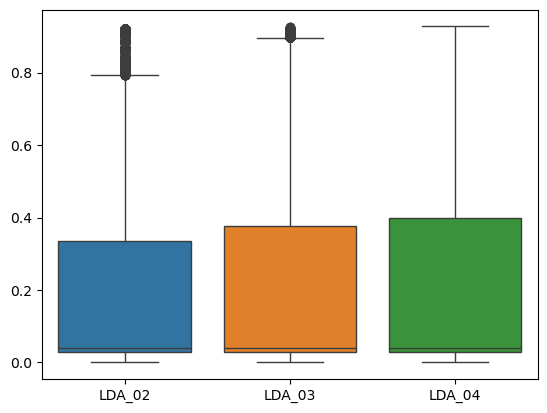

In [14]:
columns = ['LDA_02', 'LDA_03', 'LDA_04']
sns.boxplot(data=df[columns])
plt.show()

In [15]:
df_clean = df.copy()
var_list = ['LDA_02', 'LDA_03', 'LDA_04']

for var in var_list:
    iqr = df_clean[var].quantile(0.75) - df_clean[var].quantile(0.25)
    if not np.isnan(iqr):
        ub = df_clean[var].quantile(0.75) + 1.5 * iqr
        lb = df_clean[var].quantile(0.25) - 1.5 * iqr
        df_clean = df_clean[(df_clean[var] >= lb) & (df_clean[var] <= ub)]

print(df.shape)        
print(df_clean.shape)

(39644, 51)
(36103, 51)


**13- Dummy encode all categorical variables (Note: output variable should not be dummy encoded). (10 pts)**

In [22]:
cats = ['data_channel', 'weekday']
df1 = pd.get_dummies(df_clean, columns=cats, drop_first=True)
df1.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,popular,data_channel_entertainment,data_channel_lifestyle,data_channel_socialmed,data_channel_tech,data_channel_world,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday
0,http://mashable.com/2013/01/07/amazon-instant-...,731,12,219,0.663594,1.0,0.815385,4,2,1,0,4.680365,5,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,496.0,496.0,496.000000,0,0.500331,0.378279,0.040005,0.041263,0.040123,0.521617,0.092562,0.045662,0.013699,0.769231,0.230769,0.378636,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593,no,1,0,0,0,0,1,0,0,0,0,0
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731,9,255,0.604743,1.0,0.791946,3,1,1,0,4.913725,4,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0,0.799756,0.050047,0.050096,0.050101,0.050001,0.341246,0.148948,0.043137,0.015686,0.733333,0.266667,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711,no,0,0,0,0,0,1,0,0,0,0,0
2,http://mashable.com/2013/01/07/apple-40-billio...,731,9,211,0.575130,1.0,0.663866,3,1,1,0,4.393365,6,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,918.0,918.0,918.000000,0,0.217792,0.033334,0.033351,0.033334,0.682188,0.702222,0.323333,0.056872,0.009479,0.857143,0.142857,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500,yes,0,0,0,0,0,1,0,0,0,0,0
3,http://mashable.com/2013/01/07/astronaut-notre...,731,9,531,0.503788,1.0,0.665635,9,0,1,0,4.404896,7,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0,0.028573,0.419300,0.494651,0.028905,0.028572,0.429850,0.100705,0.041431,0.020716,0.666667,0.333333,0.385965,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200,no,1,0,0,0,0,1,0,0,0,0,0
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731,13,1072,0.415646,1.0,0.540890,19,19,20,0,4.682836,7,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,545.0,16000.0,3151.157895,0,0.028633,0.028794,0.028575,0.028572,0.885427,0.513502,0.281003,0.074627,0.012127,0.860215,0.139785,0.411127,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505,no,0,0,0,1,0,1,0,0,0,0,0


**14- Check if the data is imbalanced, and partition it accordingly (Consider 80% of the data as train). (20 pts)**

In [23]:
df1.groupby(by=['popular']).size()

popular
no     16116
yes    19987
dtype: int64

In [24]:
df1.columns

Index(['url', 'timedelta', 'n_tokens_title', 'n_tokens_content',
       'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens',
       'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos',
       'average_token_length', 'num_keywords', 'kw_min_min', 'kw_max_min',
       'kw_avg_min', 'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg',
       'kw_max_avg', 'kw_avg_avg', 'self_reference_min_shares',
       'self_reference_max_shares', 'self_reference_avg_sharess', 'is_weekend',
       'LDA_00', 'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
       'global_rate_negative_words', 'rate_positive_words',
       'rate_negative_words', 'avg_positive_polarity', 'min_positive_polarity',
       'max_positive_polarity', 'avg_negative_polarity',
       'min_negative_polarity', 'max_negative_polarity', 'title_subjectivity',
       'title_sentiment_polarity', 'abs_title_subjectivity',
       'abs_title_

In [25]:
var_list = ['n_tokens_title', 'n_tokens_content',
               'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens',
               'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos',
               'average_token_length', 'num_keywords', 'kw_min_min', 'kw_max_min',
               'kw_avg_min', 'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg',
               'kw_max_avg', 'kw_avg_avg', 'self_reference_min_shares',
               'self_reference_max_shares', 'self_reference_avg_sharess', 'is_weekend',
               'LDA_00', 'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
               'global_sentiment_polarity', 'global_rate_positive_words',
               'global_rate_negative_words', 'rate_positive_words',
               'rate_negative_words', 'avg_positive_polarity', 'min_positive_polarity',
               'max_positive_polarity', 'avg_negative_polarity',
               'min_negative_polarity', 'max_negative_polarity', 'title_subjectivity',
               'title_sentiment_polarity', 'abs_title_subjectivity',
               'abs_title_sentiment_polarity',
               'channel_entertainment', 'channel_lifestyle', 'channel_other',
               'channel_social_media', 'channel_tech', 'channel_world',
               'weekday_monday', 'weekday_saturday', 'weekday_sunday',
               'weekday_thursday', 'weekday_tuesday', 'weekday_wednesday']

X = df1[var_list]
y = df1['popular']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

KeyError: "['channel_entertainment', 'channel_lifestyle', 'channel_other', 'channel_social_media', 'channel_tech', 'channel_world'] not in index"

**15- Using proper input variables, build a classification tree that predicts whether or not a news article becomes popular. After building your model, do the following: (50 pts)**
* __Calculate the accuracy of the model on the train data,__
* __Plot the confusion matrix on the train data,__
* __Report the classification performance metrics on the train data,__
* __Visulaize the tree,__
* __Set the parameters of the classification tree such that it does not overfit the data.__

In [196]:
dec_tree = tree.DecisionTreeClassifier(ccp_alpha=0.0005, class_weight='balanced')
dec_tree.fit(X_train, y_train)

# Predict
y_train_hat = dec_tree.predict(X_train)

print('Train Accuracy:', "{:.2f}%".format(accuracy_score(y_train, y_train_hat)*100))

Train Accuracy: 63.65%


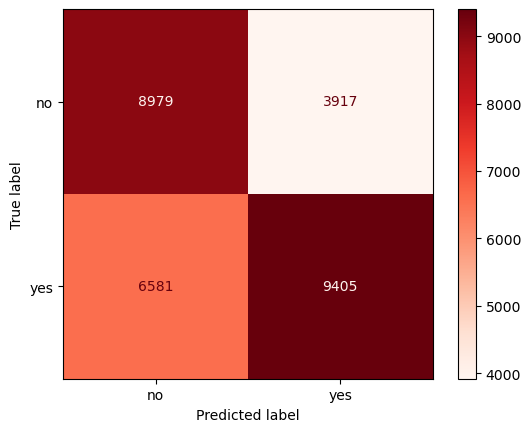

In [197]:
ConfusionMatrixDisplay.from_estimator(dec_tree, X_train, y_train, cmap=plt.cm.Reds)
plt.show()

In [198]:
print(classification_report(y_train, y_train_hat))

              precision    recall  f1-score   support

          no       0.58      0.70      0.63     12896
         yes       0.71      0.59      0.64     15986

    accuracy                           0.64     28882
   macro avg       0.64      0.64      0.64     28882
weighted avg       0.65      0.64      0.64     28882



In [199]:
text_representation = tree.export_text(dec_tree, feature_names=var_list)
print(text_representation)

|--- kw_avg_avg <= 2887.86
|   |--- is_weekend <= 0.50
|   |   |--- self_reference_avg_sharess <= 2170.38
|   |   |   |--- kw_max_max <= 654150.00
|   |   |   |   |--- channel_tech <= 0.50
|   |   |   |   |   |--- kw_max_avg <= 3603.71
|   |   |   |   |   |   |--- class: no
|   |   |   |   |   |--- kw_max_avg >  3603.71
|   |   |   |   |   |   |--- class: yes
|   |   |   |   |--- channel_tech >  0.50
|   |   |   |   |   |--- class: yes
|   |   |   |--- kw_max_max >  654150.00
|   |   |   |   |--- channel_tech <= 0.50
|   |   |   |   |   |--- channel_social_media <= 0.50
|   |   |   |   |   |   |--- n_non_stop_unique_tokens <= 0.56
|   |   |   |   |   |   |   |--- class: no
|   |   |   |   |   |   |--- n_non_stop_unique_tokens >  0.56
|   |   |   |   |   |   |   |--- class: no
|   |   |   |   |   |--- channel_social_media >  0.50
|   |   |   |   |   |   |--- class: yes
|   |   |   |   |--- channel_tech >  0.50
|   |   |   |   |   |--- class: no
|   |   |--- self_reference_avg_sharess > 

In [200]:
dot_data = tree.export_graphviz(dec_tree, feature_names=var_list, class_names=['no', 'yes'], rounded=True, filled=True)
graph = graph_from_dot_data(dot_data)
graph.write_pdf('tree.pdf')

True

**16- Test the tree you built on the test data by doing the following: (15 pts)**
* __Calculate the accuracy of the model on the test data,__
* __Plot the confusion matrix on the test data,__
* __Report the classification performance metrics on the test data,__

Test Accuracy: 62.55%


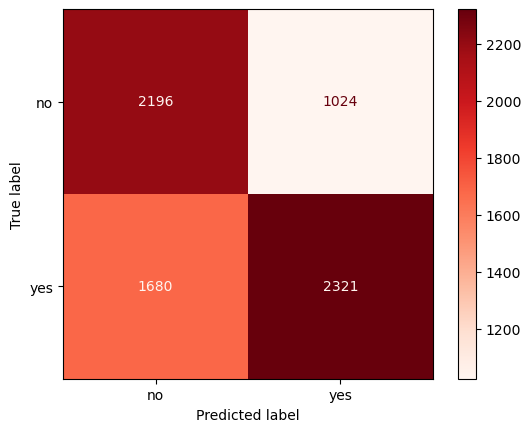

In [201]:
y_test_hat = dec_tree.predict(X_test)
print('Test Accuracy:', "{:.2f}%".format(accuracy_score(y_test, y_test_hat)*100))
ConfusionMatrixDisplay.from_estimator(dec_tree, X_test, y_test, cmap=plt.cm.Reds)
plt.show()

In [202]:
print(classification_report(y_test, y_test_hat))

              precision    recall  f1-score   support

          no       0.57      0.68      0.62      3220
         yes       0.69      0.58      0.63      4001

    accuracy                           0.63      7221
   macro avg       0.63      0.63      0.63      7221
weighted avg       0.64      0.63      0.63      7221



**17- Comparing your train and test results, do you see any evidence of overfitting? Explain. (10 pts)**

Looking at the results of both the training and test models, it suggests that there may not be evidence of overfitting. Overfitting occurs when a model performs significantly better on the training data compared to the test data, indicating that it has learned the training data's specific patterns and noise rather than generalizing well to unseen data. The training and test model's accuracy does not show evidence of overfitting since they both have a accuracy of 64%.

**18- Which variables are the most important ones? Sort and show the input variables based on their importance. (10 pts)**

In [203]:
df2 = pd.DataFrame({'Variable':var_list, 'Importance':dec_tree.feature_importances_}).sort_values(by=['Importance'], ascending=False)
df2

,Variable,Importance
19,kw_avg_avg,0.262671
23,is_weekend,0.167534
45,channel_entertainment,0.143983
22,self_reference_avg_sharess,0.069851
48,channel_social_media,0.060012
49,channel_tech,0.057424
20,self_reference_min_shares,0.055584
15,kw_max_max,0.040463
1,n_tokens_content,0.029369
26,LDA_02,0.026380


**19- Based on your model, what would you suggest to make an online new popular? (20 pts)**

Based on the model's analysis, to increase the chances of making an online news article popular, it is recommended to focus on keywords with high average shares, publish content on weekends, prioritize entertainment-related topics, utilize self-referencing within the platform, and leverage social media channels.

---
### Bonus Question

**20- Identify the most important variables using the permutation method and compare your results with the Gini-based importance method findings. (20 pts)**

In [204]:
df2 = pd.DataFrame({'Variable':var_list, 'Importance':dec_tree.feature_importances_}).sort_values(by=['Importance'], ascending=False)
df2

,Variable,Importance
19,kw_avg_avg,0.262671
23,is_weekend,0.167534
45,channel_entertainment,0.143983
22,self_reference_avg_sharess,0.069851
48,channel_social_media,0.060012
49,channel_tech,0.057424
20,self_reference_min_shares,0.055584
15,kw_max_max,0.040463
1,n_tokens_content,0.029369
26,LDA_02,0.026380


In [206]:
imp = permutation_importance(dec_tree, X_train, y_train, n_repeats=30)
imp_avg, imp_std = imp['importances_mean'], imp['importances_std']
imp_df = pd.DataFrame({'Variable': X_train.columns, 'imp_avg': imp_avg, 'imp_std': imp_std}).sort_values(by=['imp_avg'], ascending=False)
imp_df

,Variable,imp_avg,imp_std
19,kw_avg_avg,0.040139,0.002156
23,is_weekend,0.030455,0.001851
45,channel_entertainment,0.025680,0.001197
20,self_reference_min_shares,0.016053,0.001128
48,channel_social_media,0.010715,0.000693
49,channel_tech,0.010327,0.000745
17,kw_min_avg,0.007879,0.000938
15,kw_max_max,0.007168,0.000722
1,n_tokens_content,0.005688,0.000946
26,LDA_02,0.004507,0.000453
